#                                                    Lending Club Case Study

## Objective

* Understand risk analytics in Banking and Financial services.
* Understand the Driving factors behind a loan default.


In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import markdown
import matplotlib.pyplot as plt

In [2]:
# read a csv file
loan=pd.read_csv(r"C:\Users\Jaswanth Reddy\Downloads\loan\loan.csv")
loan.head(10)

D:\Python\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Check number of rows and columns
loan.shape

(39717, 111)

In [4]:
#The missing value percentage column-wise

missing_percent=pd.DataFrame((loan.isna().sum()/len(loan)*100).items(),columns=['column_name','missing_percentage'])
missing_percent

,column_name,missing_percentage
0,id,0.000000
1,member_id,0.000000
2,loan_amnt,0.000000
3,funded_amnt,0.000000
4,funded_amnt_inv,0.000000
...,...,...
106,tax_liens,0.098195
107,tot_hi_cred_lim,100.000000
108,total_bal_ex_mort,100.000000
109,total_bc_limit,100.000000


### Above table shows more number of missing columns and also assuming that more than 30% of missing values may mislead analysis, so removing those columns.

In [5]:
col_less_30=missing_percent[(missing_percent['missing_percentage']>=30)]['column_name']
loan.drop(columns=list(col_less_30),axis='columns',inplace=True)
print(loan.shape)

(39717, 53)


In [6]:
# Check for unique values
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

#### Looking at the above table shows that they are many columns have same value and this misleads data analysis, hence dropping those columns

In [7]:
unique_count=loan.nunique()
loan.drop(columns=list(unique_count[unique_count.values==1].index),axis='columns',inplace=True)
print(loan.shape)

(39717, 44)


In [8]:
print('Before removing columns:\n',loan.columns)

Before removing columns:
 Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


#### Removing unnecessary columns which doesn't help in Data Analysis

In [9]:
loan.drop(columns=['id','member_id','url','title','inq_last_6mths','open_acc','pub_rec','revol_util','out_prncp_inv','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies','earliest_cr_line','out_prncp','zip_code','total_acc', 'total_pymnt'],inplace=True)

In [10]:
print('After removing columns:\n',loan.columns)

After removing columns:
 Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'revol_bal'],
      dtype='object')


#### Handling missing values 

In [11]:
print(loan.isna().sum())

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2459
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
revol_bal                 0
dtype: int64


In [21]:
loan['emp_title'].replace(to_replace =[np.nan],value='not_disclosed',inplace=True)  
loan["emp_length"].fillna(loan["emp_length"].mode()[0], inplace = True)
print("total number of columns having missing values:",(loan.isna().sum()>0).sum())

total number of columns having missing values: 0


#### Standarize Values

In [22]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,revol_bal
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,13382.528086
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,15885.016641
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,3703.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,8850.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,17058.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,149588.000000


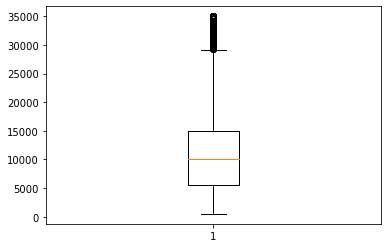

Outlier Value loan_amnt ---- 1.0593172896133878


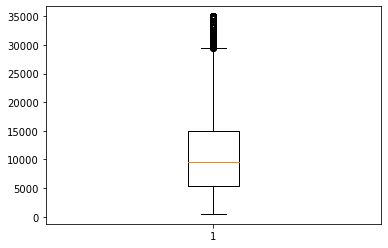

Outlier Value funded_amnt ---- 1.0817102383375885


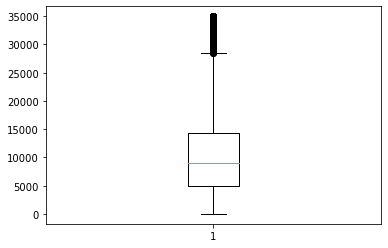

Outlier Value funded_amnt_inv ---- 1.1062129383204573


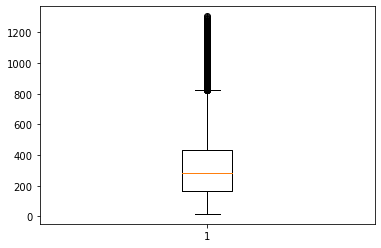

Outlier Value installment ---- 1.1284190952484736


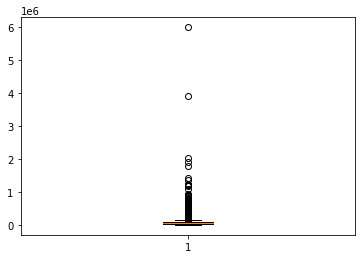

Outlier Value annual_inc ---- 30.949184600959956


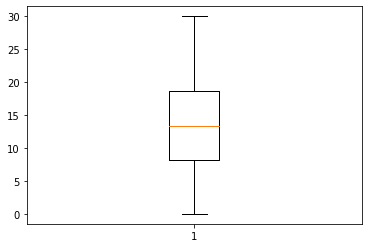

Outlier Value dti ---- -0.028043330951910854


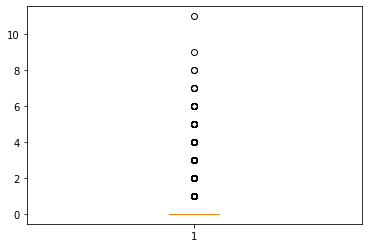

Outlier Value delinq_2yrs ---- 5.022035212957436


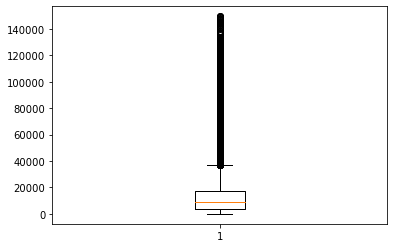

Outlier Value revol_bal ---- 3.1908836833267213


In [24]:
# Detecting Outliers
a=['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','delinq_2yrs','revol_bal']
for i in a:
    plt.boxplot(loan[i])
    plt.show()
    print('Outlier Value',i,'----',loan[i].skew())
    print("==================================================================")

In [25]:
# Replacing Outliers with Median Values
a=['annual_inc','delinq_2yrs','revol_bal']
for i in a:
    value1=loan[i].quantile(0.50) 
    value2=loan[i].quantile(0.95) 
    print(value1,           value2)
    loan[i] = np.where(loan[i] > value2, value1, loan[i])
    print(loan[i])

59000.0 142000.0
0         24000.0
1         30000.0
2         12252.0
3         49200.0
4         80000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715     59000.0
39716     22000.0
Name: annual_inc, Length: 39717, dtype: float64
0.0 1.0
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    1.0
39714    0.0
39715    0.0
39716    1.0
Name: delinq_2yrs, Length: 39717, dtype: float64
8850.0 41656.399999999936
0        13648.0
1         1687.0
2         2956.0
3         5598.0
4        27783.0
          ...   
39712     7274.0
39713     8847.0
39714     9698.0
39715     8850.0
39716     4175.0
Name: revol_bal, Length: 39717, dtype: float64


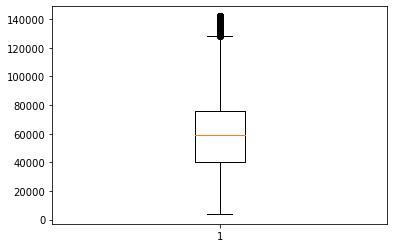

annual_inc ---- 0.7056976522138821


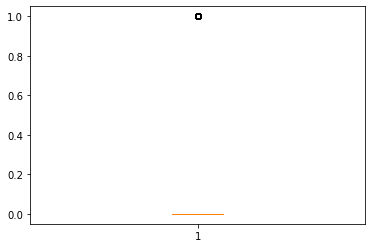

delinq_2yrs ---- 3.019257953779835


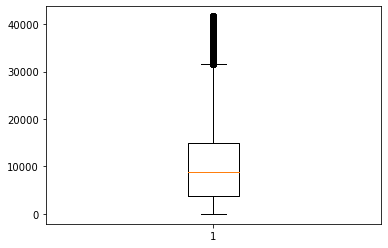

revol_bal ---- 1.160127216635936


In [26]:
# After removing outliers
for i in a:
    plt.boxplot(loan[i])
    plt.show()
    print(i,'----',loan[i].skew())

In [30]:
# Removing percentage symbol
loan['int_rate']=pd.to_numeric(loan["int_rate"].apply(lambda x : x.split('%')[0]))
loan['loan_issued_month']=loan.issue_d.apply(lambda x:x.split('-')[0])
loan['loan_issued_year']=pd.to_numeric(loan["issue_d"].apply(lambda x : x.split('-')[1]))

In [31]:
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
loan_amnt              39717 non-null int64
funded_amnt            39717 non-null int64
funded_amnt_inv        39717 non-null float64
term                   39717 non-null object
int_rate               39717 non-null float64
installment            39717 non-null float64
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_title              39717 non-null object
emp_length             39717 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
purpose                39717 non-null object
addr_state             39717 non-null object
dti                    39717 non-null float64
delinq_2yrs            39717 non-null float64
revol_bal              39717 non

In [32]:
# Filtering Data
loan=loan[~(loan['loan_status']=='Current')]
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

Loan status "Current" doesnt give any information on analysis for approving or rejecting loan application

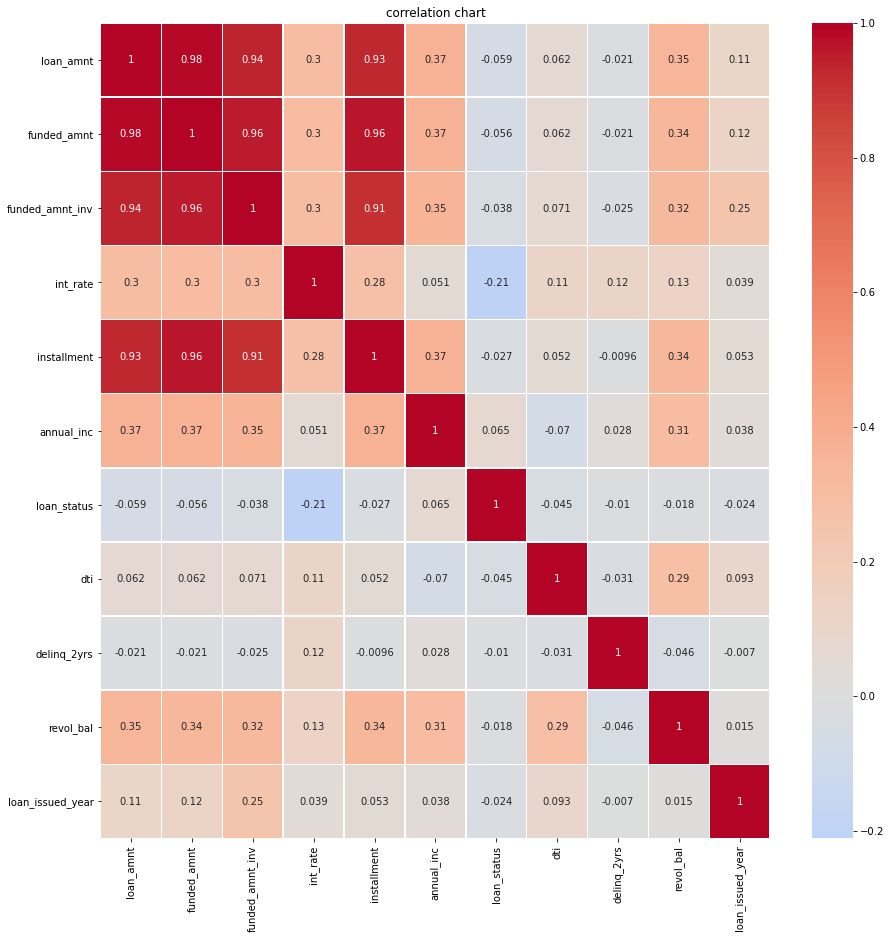

In [41]:
# Heatmap for analyzing correlation between the columns
corr = loan.corr()
corr
plt.figure(figsize=(15,15))
plt.title("correlation chart")
sns.heatmap(corr,annot=True,cmap="coolwarm" ,linewidths=.5,center=0)

* Among all parameters annual income highly corelates in positive direction and interest rate in negative direction  with loan status.
* loan amount, funded amount, funded amount,installment are highly correlated to each other.
* loan amount, funded amount, funded amount,installment,interest rate are negatively correlated to loan status.
* As a overall most of the columns are negatively correlated to loan status.

### Univariate Analysis & Segmented Analysis

 36 months    29096
 60 months     9481
Name: term, dtype: int64
term


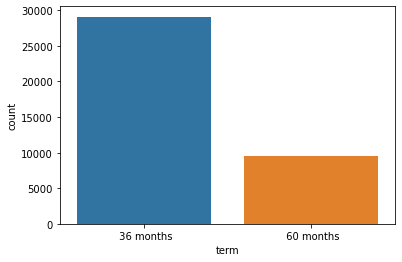

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64
grade


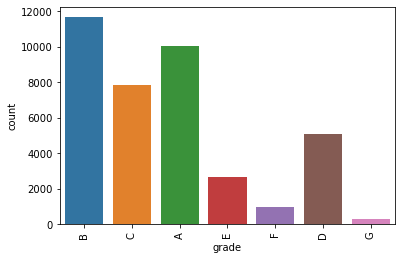

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64
sub_grade


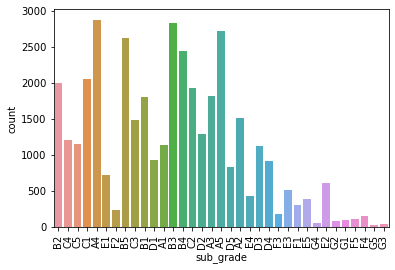

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64
emp_length


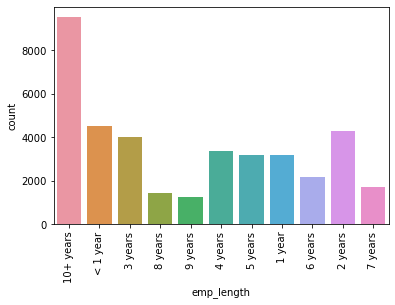

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64
home_ownership


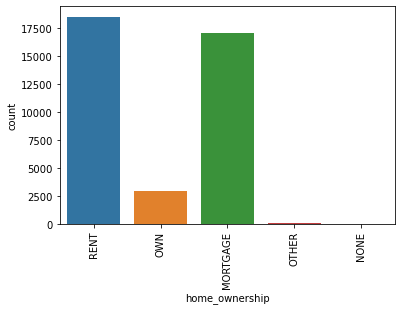

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64
verification_status


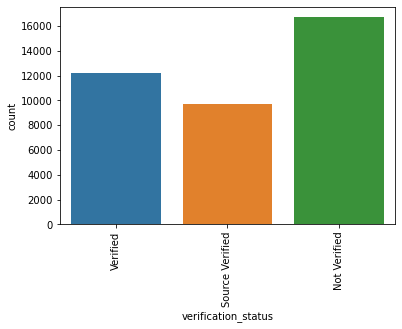

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64
loan_status


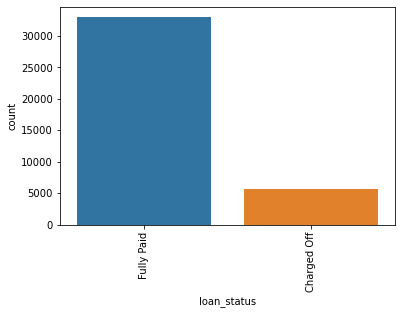

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64
purpose


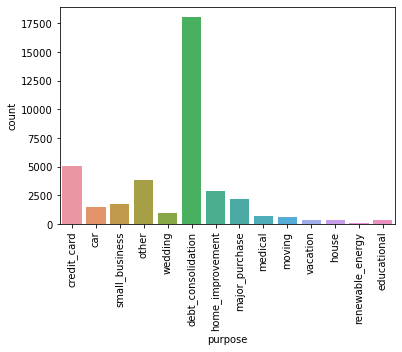

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
OR     435
AL     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64
addr_state


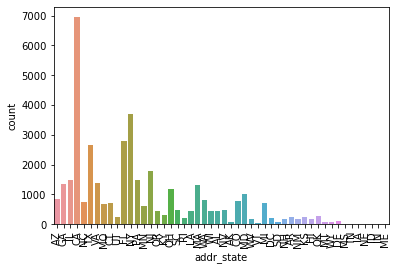

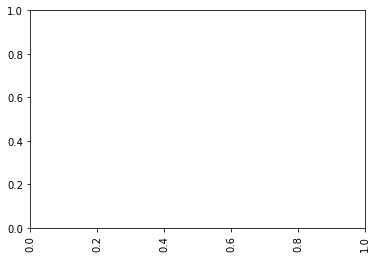

In [33]:
categorical_values=['term', 'grade', 'sub_grade', 'emp_length',
       'home_ownership','verification_status', 'loan_status',
       'purpose', 'addr_state']
for i in categorical_values:
    print(loan[i].value_counts())
    print(i)
    sns.countplot(x=i,data=loan)
    plt.show()
    plt.xticks(rotation=90)

*Observations*
* Maximum number of loans are taken for 36 months
* Most number of Borrowers will fall under Grade B,A,C type
* Most number of Borrowers of Sub Grade is A4
* Most number of Borrowers have employee experience of more than 10 years
* Most number of Borrowers are under Rent, Mortage type
* Most number of Borrowers Verification status is not verified
* Most number of Borrowers have fully paid their loan and very borrowers have defaulted the loan
* Most number of Loans are given for debt_consolidation purpose
* Most number of Borrowers address is falling under CA

In [34]:
loan['new_employee_type']=loan['emp_title'].apply(lambda x: 'not_disclosed' if x=='not_disclosed' else 'disclosed')
loan['loan_status']=loan['loan_status'].apply(lambda x:0 if x=='Charged Off' else 1)

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


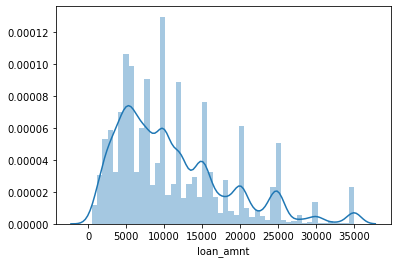

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


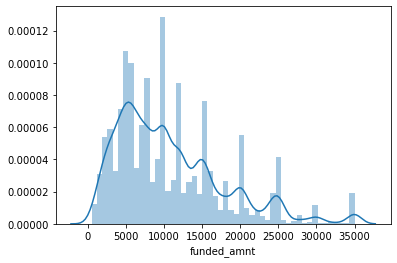

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


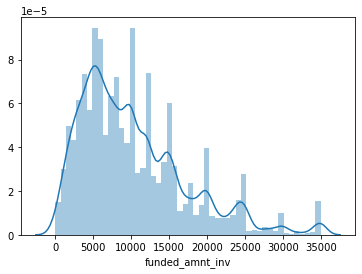

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64


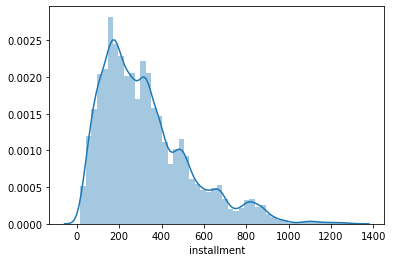

count     38577.000000
mean      60837.984481
std       27161.395455
min        4000.000000
25%       40000.000000
50%       58868.000000
75%       75000.000000
max      142000.000000
Name: annual_inc, dtype: float64


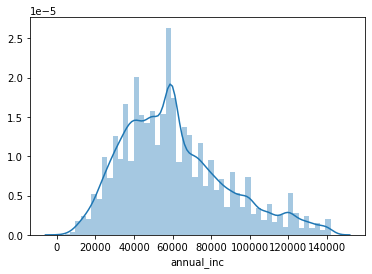

count    38577.000000
mean     10461.739897
std       8864.626206
min          0.000000
25%       3650.000000
50%       8762.000000
75%      14756.000000
max      41652.000000
Name: revol_bal, dtype: float64


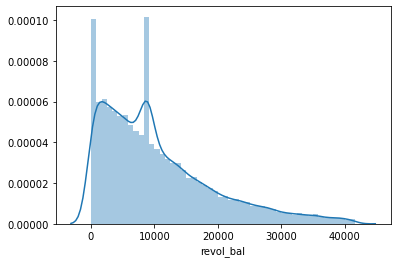

In [39]:
numeric_values=['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','revol_bal']
for i in numeric_values:
    print(loan[i].describe())
    sns.distplot(loan[i])
    plt.show()

**Observations**
* Most of the loan amount is taken between 4000 to 6000 range
* Most of the funded amount and funded amount invested will also falls between 4000 to 6000 range 
* Most of the installments were under 200 range
* Most of the Borrowers salary was around 60000
* Most of the Borrowers revoling balance is 0-10k which is unstable

### Bivariate Analysis

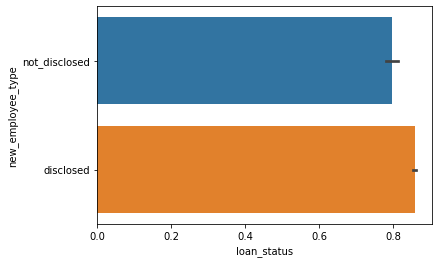

In [40]:
sns.barplot(x='loan_status',y='new_employee_type',data=loan)

Disclosed employee type employers are more likely to repay loans

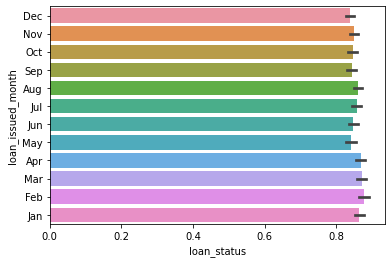

In [66]:
sns.barplot(x='loan_status',y='loan_issued_month',data=loan)

Loans issued in between Feb to Apr are more likely to repay loan

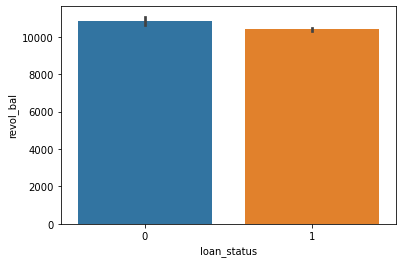

In [45]:
sns.barplot(x='loan_status',y='revol_bal',data=loan)

High credit revol balance customers are more loan defaulters

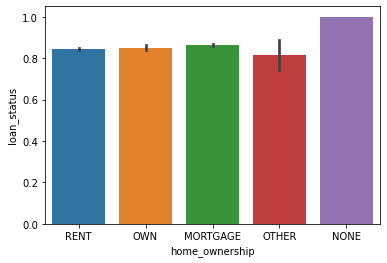

In [47]:
sns.barplot(x='home_ownership',y='loan_status',data=loan)

Giving loans to home_ownership not known then there is a high chance of loan defaults

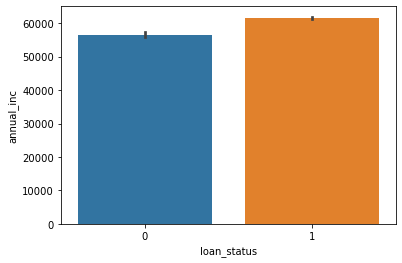

In [48]:
sns.barplot(x='loan_status',y='annual_inc',data=loan) 

For low annual income ,high chance of loan defaults

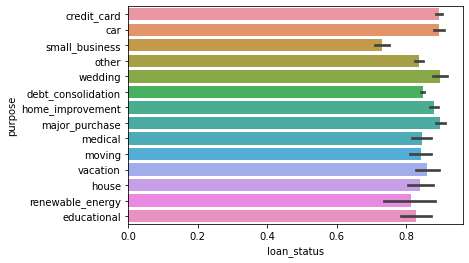

In [49]:
sns.barplot(x='loan_status',y='purpose',data=loan)

Giving loans to small business , there is an high chance of loan defaults

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

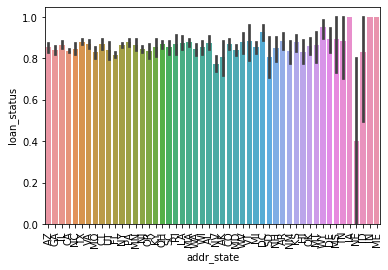

In [50]:
sns.barplot(x='addr_state',y='loan_status',data=loan)
plt.xticks(rotation=90)

NE addr_state provided customers are more loan defaulters 

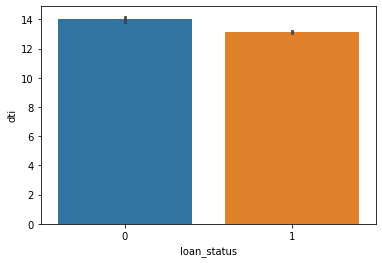

In [51]:
sns.barplot(x='loan_status',y='dti',data=loan)

Higher dti customers are more loan defaulters

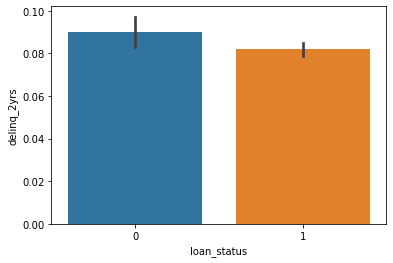

In [52]:
sns.barplot(x='loan_status',y='delinq_2yrs',data=loan)

Higher delinq_2yrs customers are more defaulters

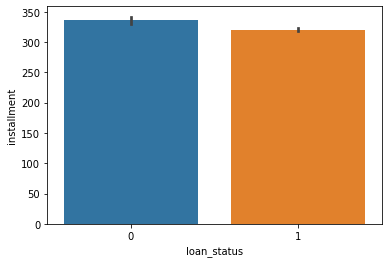

In [54]:
sns.barplot(x='loan_status',y='installment',data=loan)

More the number of installments, more chance of loan defaults

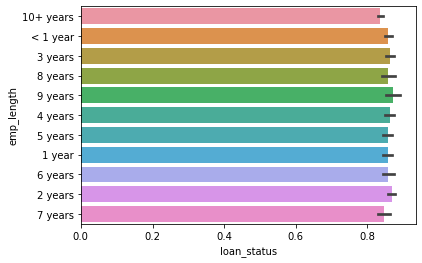

In [55]:
sns.barplot(x='loan_status',y='emp_length',data=loan)

More number of employee experience are likely loan defaults when compared to less number of experience

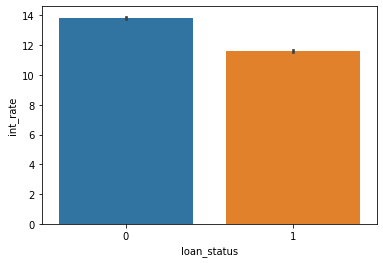

In [67]:
sns.barplot(x='loan_status',y='int_rate',data=loan)

Higher the interest rate more the loan defaults

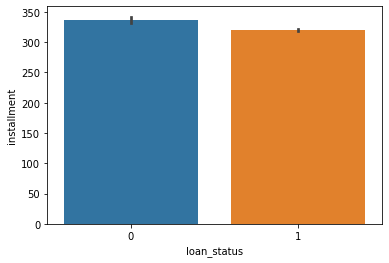

In [57]:
sns.barplot(x='loan_status',y='installment',data=loan)

More number of installment , more chance of loan defaults

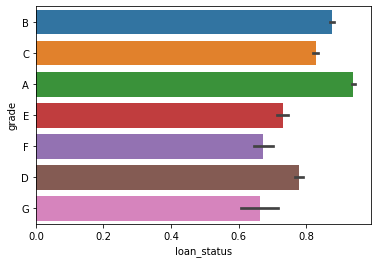

In [58]:
sns.barplot(x='loan_status',y='grade',data=loan)

Most defaults are falling under G and F grade, most non defaults are falling under A grade 

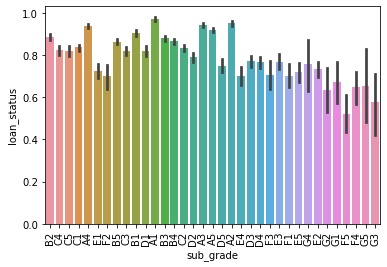

<Figure size 1440x1440 with 0 Axes>

In [59]:
sns.barplot(x='sub_grade',y='loan_status',data=loan)
plt.xticks(rotation=90)
plt.figure(figsize=(20,20))
plt.show()

Under sub_grade F5 as a high chance of loan defaults 

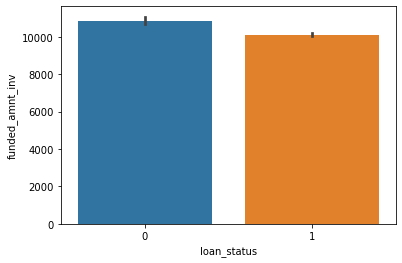

In [61]:
sns.barplot(x='loan_status',y='funded_amnt_inv',data=loan)

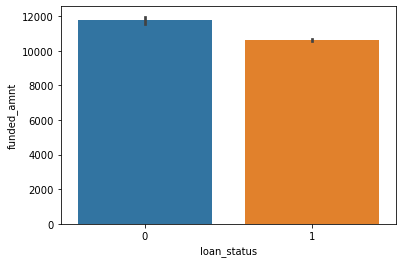

In [62]:
sns.barplot(x='loan_status',y='funded_amnt',data=loan)

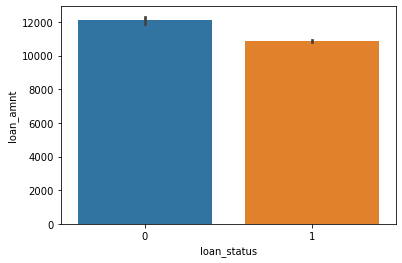

In [63]:
sns.barplot(x='loan_status',y='loan_amnt',data=loan)

funded amount, funded amount inv, loan amount are highly correlated.
More funded amount, funded amount inv, loan amount more the loan defaults

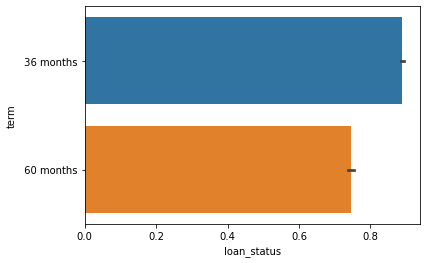

In [64]:
sns.barplot(x='loan_status',y='term',data=loan)

From the plot it is clear that as more the time for paying loan amount , there is an high chance of loan defaults

### Conclusion|

Lending Loans to below categories may lead to loan defaults:
> Not disclosing employee type, Low annual income
,Home Ownership status is not known,NE stated add_state, Small Business Purpose, High number of installments, G,F grades especially F5 sub grade category and High number of tenure months to repay loan leads to loan defaults
